In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df  =pd.read_csv('fact_sales_monthly.csv')
df.tail()

,date,fiscal_year,product_code,customer_code,sold_quantity
1425701,2021-12-01,2022,A7321160303,90023028,292
1425702,2021-12-01,2022,A7321160303,90023030,46
1425703,2021-12-01,2022,A7321160303,90024183,25
1425704,2021-12-01,2022,A7321160303,90024184,25
1425705,2021-12-01,2022,A7321160303,90027207,23


In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425706 entries, 0 to 1425705
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   date           1425706 non-null  datetime64[ns]
 1   fiscal_year    1425706 non-null  int64         
 2   product_code   1425706 non-null  object        
 3   customer_code  1425706 non-null  int64         
 4   sold_quantity  1425706 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 54.4+ MB


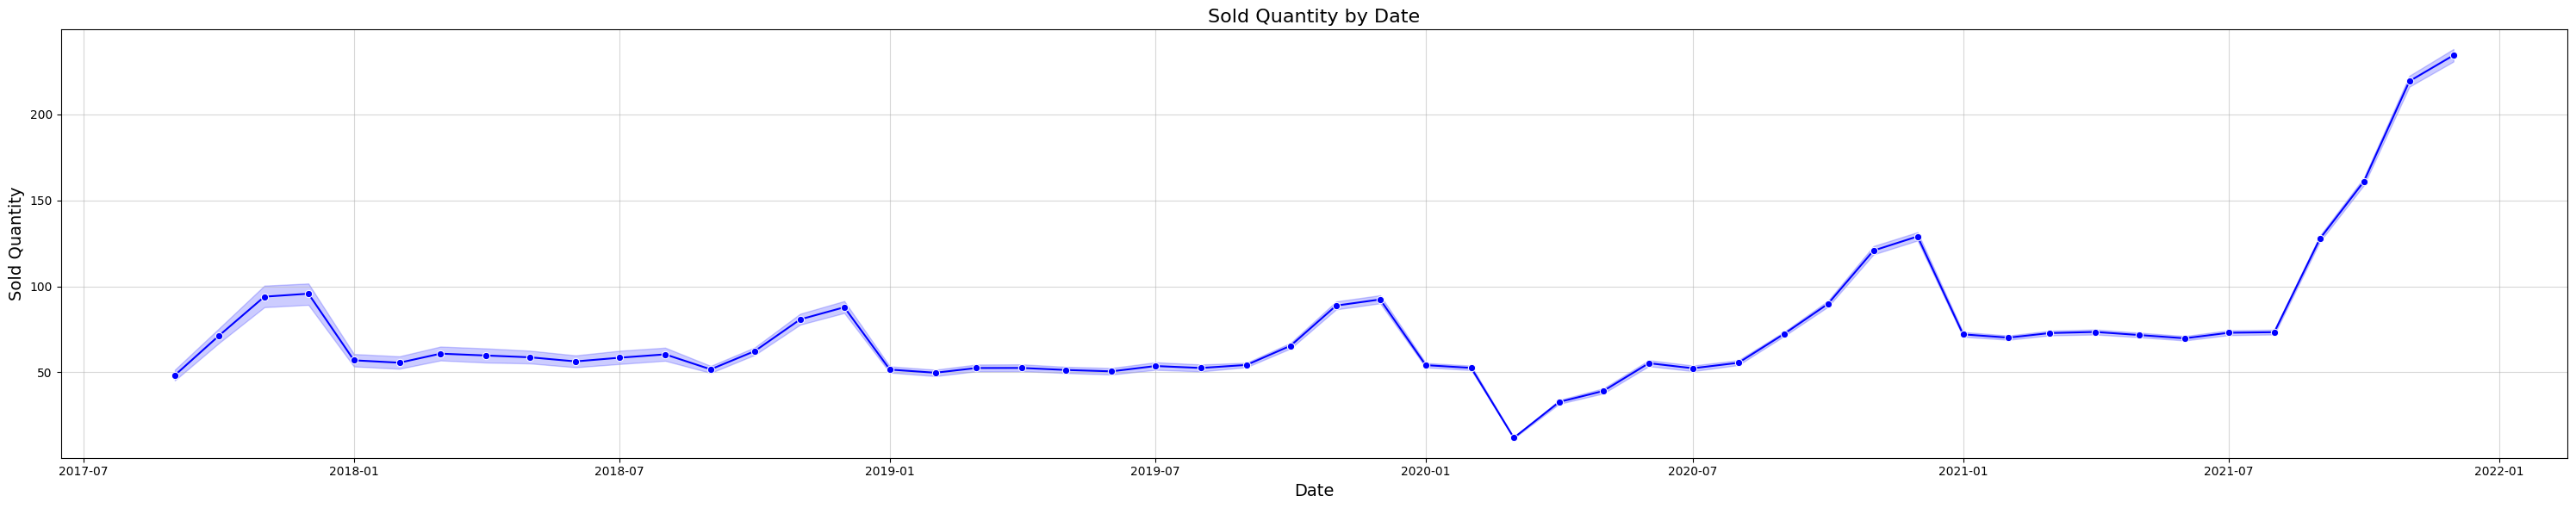

In [5]:
# Line plot
plt.figure(figsize=(30, 6))
sns.lineplot(data=df, x='date', y='sold_quantity', marker='o', color='blue')

# Customizing the plot
plt.title('Sold Quantity by Date', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sold Quantity', fontsize=14)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

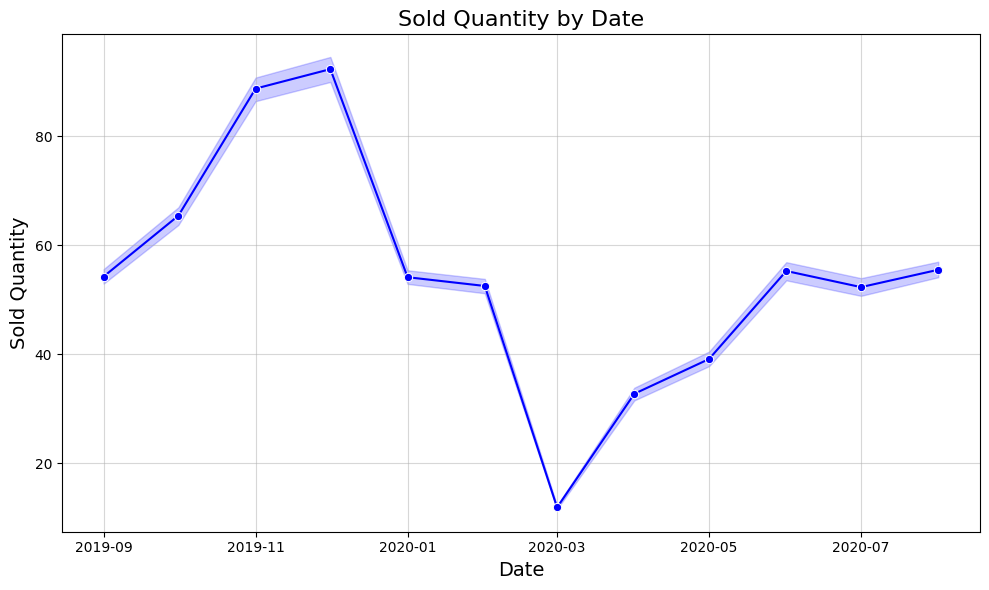

In [6]:
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['fiscal_year'] == 2020], x='date', y='sold_quantity', marker='o', color='blue')

# Customizing the plot
plt.title('Sold Quantity by Date', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sold Quantity', fontsize=14)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
len(df[df['date']=='2020-03']['customer_code'].unique())

157

In [8]:
# Define adjustment factors
adjustment_factors = {
    (2020, 3): 5,          # Year 2020, March
    (2020, 4): 5 / 3,      # Year 2020, April
    (2020, 5): 5 / 4       # Year 2020, May
}

# Apply adjustment
df['quantity'] = df.apply(
    lambda x: x['sold_quantity'] * adjustment_factors.get((x['date'].year, x['date'].month), 1),
    axis=1
)

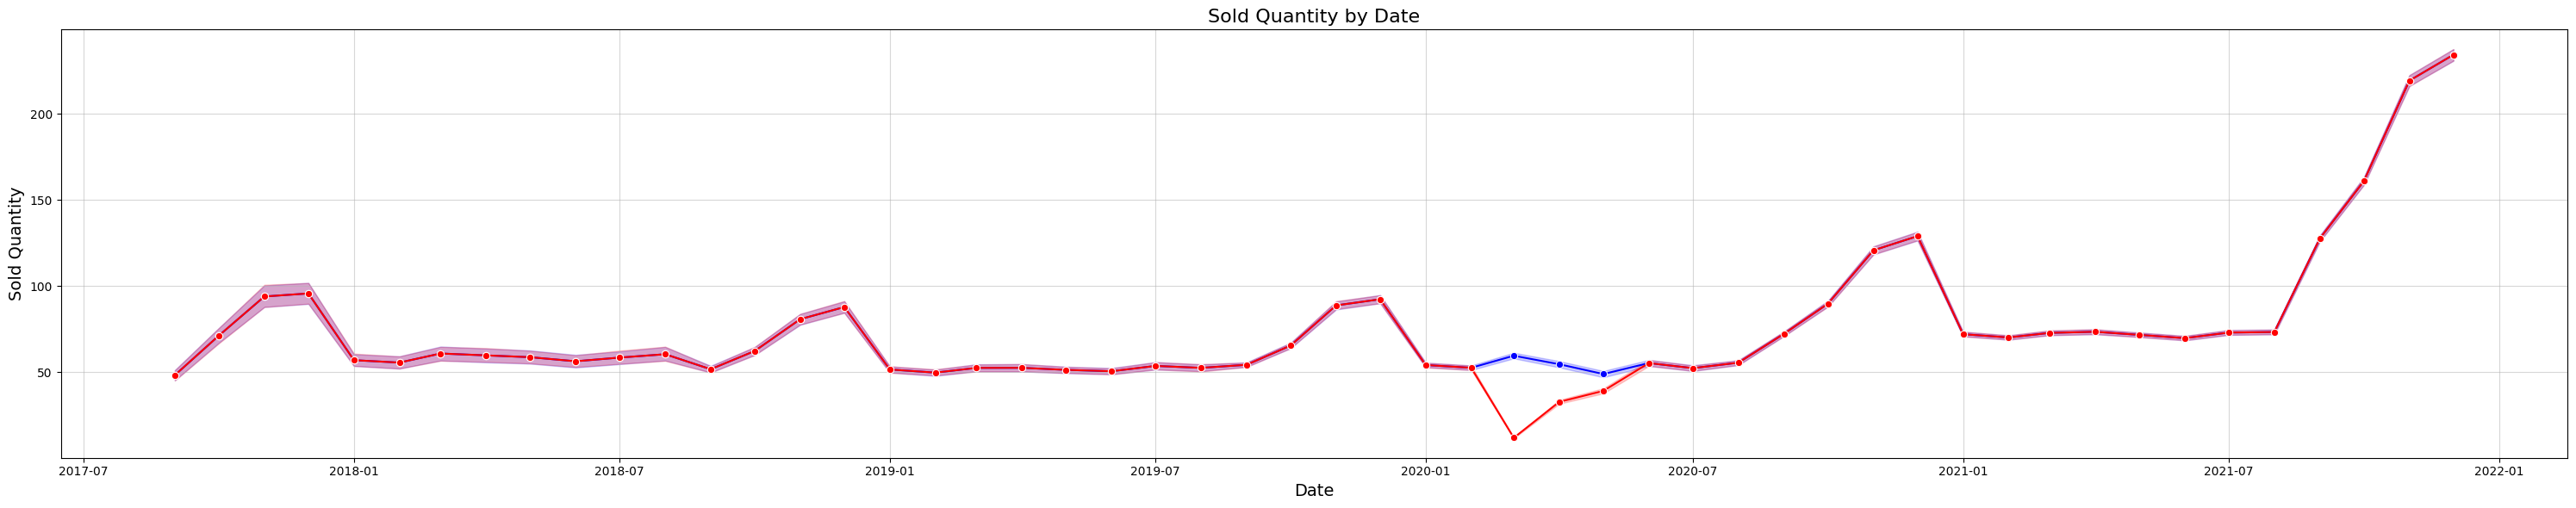

In [9]:
# Line plot
plt.figure(figsize=(30, 6))
sns.lineplot(data=df, x='date', y='quantity', marker='o', color='blue')
sns.lineplot(data=df, x='date', y='sold_quantity', marker='o', color='red')

# Customizing the plot
plt.title('Sold Quantity by Date', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sold Quantity', fontsize=14)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['fiscal_year'] == 2020], x='date', y='quantity', marker='o', color='blue')
sns.lineplot(data=df[df['fiscal_year'] == 2020], x='date', y='sold_quantity', marker='o', color='red')

# Customizing the plot
plt.title('Sold Quantity by Date', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sold Quantity', fontsize=14)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()